# Fallstudie 4: Zeichnen einer Stadt

#### Marcel Lüthi, Departement Mathematik und Informatik, Universität Basel

In dieser Fallstudie besprechen wir zusammen, wie wir mit Hilfe von Prozeduren ein Problem zerlegen und, auf flexible Art und Weise, wieder zusammenbauen können. Das konkrete Problem, an welchem wir die Strategie veranschaulichen, ist das Zeichnen einer Stadt. 

### Problemstellung

![city](images/city.png)

Unsere Aufgabe ist es, die obige Stadt zu zeichnen. Statt einfach nur genau die Stadt zu zeichnen, wollen wir nützliche Abstraktionen einführen, die uns nicht nur ermöglichen genau diese Stadt zu zeichnen, sondern auch andere Städte, Häuser und Hochhäuser. Vielleicht schaffen wir es sogar Abstraktionen zu schaffen, die für andere Anwendungen nützlich sind. 

### Hinweise zur Turtle Bibliothek

Python's Turtlegrafik kann nicht direkt in Jupyter-Notebooks verwendet werden. Wir können aber eine Bibliothek importieren, die dieselbe Funktionalität implementiert

In [2]:
from pjnturtle.turtle import Turtle

turtle = Turtle()

Die Befehle, die wir in diesem Notebook nutzen sind:

| Befehl | Erklärung |
|------------------------------|------------------|
| `penUp` / `penDown`              | Stift hoch/runter | 
| `turnLeft` / `turnRight`                     | nach rechts / links drehen | 
| `forward` / `backward`   |  vorwärts, rückwärts gehen | 
| `penColor` | Farbe setzten | 
| `home` | Turtle auf Punkt (0, 0) setzten und nach Norden ausrichten |
| `reset` | Zeichenfarbe und andere Attribute zurücksetzen | 
| `clear` | Zeichenfläche säubern | 
| `display` | Zeichnung anzeigen | 
| `drawTurtle` | Turtle an aktuelle Position zeichnen |
| `fill` | Füllt die umliegende, geschlossene Figure mit Farbe aus. |

### Strategie

Das Problem als Ganzes zu lösen ist schwierig. Wir überlegen uns stattdessen zuerst, wie wir dieses Problem in kleinere Teile zerlegen können. Jeden Teil implementieren wir dann als eine Prozedur. Unser Ziel ist es, die Prozeduren allgemein zu schreiben, so dass wir Sie in vielen unterschiedlichen Situationen einsetzen können. 

#### Miniübungen 

* Welche kleineren Probleme würden Sie lösen?
* Überlegen Sie sich, was geeignete Prozeduren wären um diese kleineren Probleme zu lösen. 
    * Was ist der Name der Prozeduren?


### Schritt 1: Zeichnen der geometrischen Figuren

Die einfachsten Elemente für unsere Zeichung sind die geometrischen Formen *Dreieck* und *Rechteck*. Die einfachste Implementation sieht wie folgt aus:

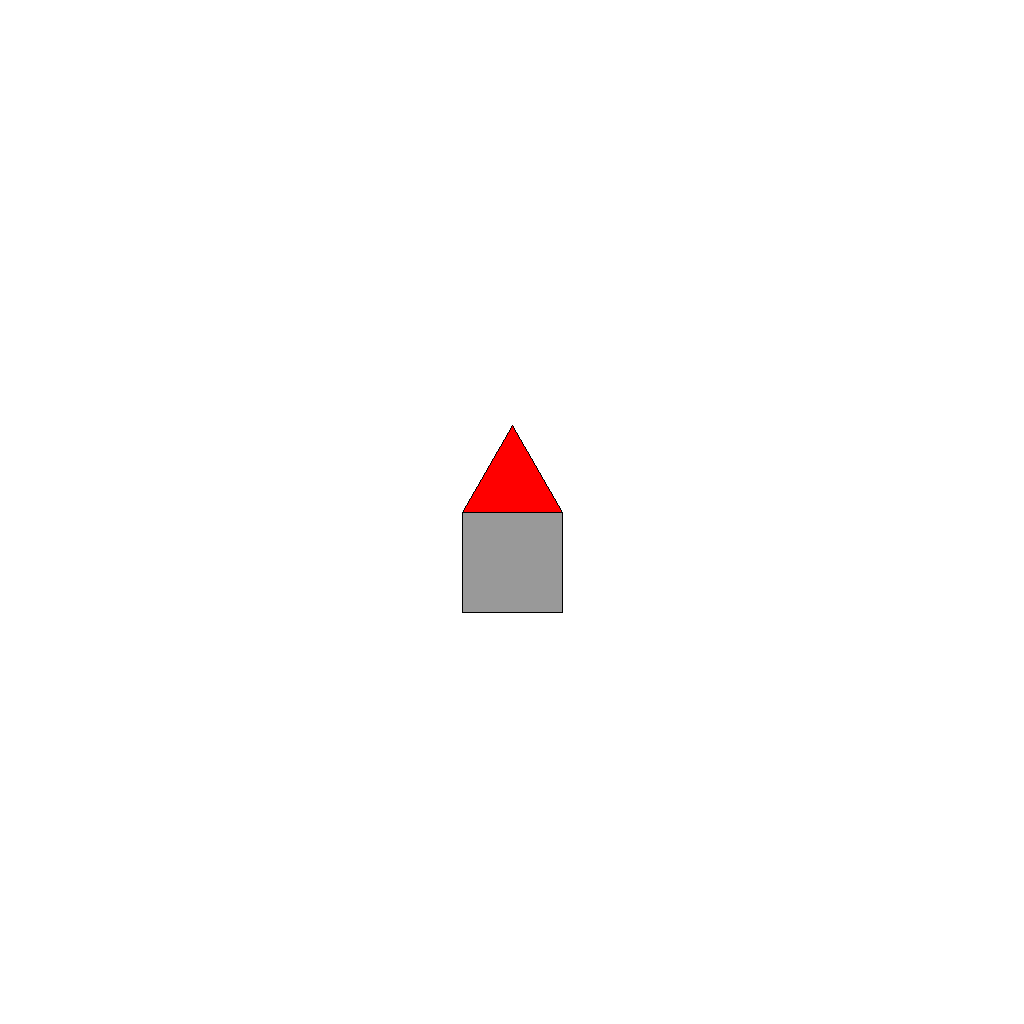

In [23]:
def goto(x, y):    
    turtle.home()
    turtle.forward(y)
    turtle.turnRight(90)
    turtle.forward(x)
    turtle.turnLeft(90)
    
def draw_rectangle(x, y, width, height):
        
    turtle.reset()
    turtle.penUp()
    goto(x, y)
    turtle.penDown()
    turtle.forward(height)
    turtle.turnRight(90)
    turtle.forward(width)
    turtle.turnRight(90)
    turtle.forward(height)
    turtle.turnRight(90)    
    turtle.forward(width)
    turtle.turnRight(90)    
    
    # fill
    turtle.penUp();
    turtle.turnRight(30)    
    turtle.forward(2)
    turtle.penColor('GREY')
    turtle.fill()
    
def draw_triangle(x, y, length):
        
    turtle.reset()    

    turtle.penUp()
    goto(x, y)
    
    turtle.penDown()
    turtle.turnRight(30)
    turtle.forward(length)
    turtle.turnRight(120)
    turtle.forward(length)
    turtle.turnRight(120)
    turtle.forward(length)
    turtle.turnRight(120) 

    
    # fill
    turtle.penUp();
    turtle.turnRight(30)
    turtle.forward(length / 2)
    turtle.penColor('RED');
    turtle.fill();

    
turtle.clear()
draw_rectangle(-50, -100, 100, 100)
draw_triangle(-50, 0, 100)
turtle.display()


### Miniübungen

* Ergänzen Sie die beiden Prozeduren `draw_triangle` und `draw_rectangle` um die Argumente `x` und `y`, die uns erlauben eine bestimmte Position anzugeben, an der das Objekt gezeichent wird. Zeichnen Sie das Objekt dann an diese Stelle. 
* Gibt es Teile vom Code die Sie als nützliche Hilfsfunktionen abstrahieren könnten?


### Schritt 2: Zeichnen von Häusern und Wolkenkratzern

Wir gehen nun in der Abstaktion einen Grad höher. Aus einem Rechteck und einem Dreieck können wir ein Haus zeichnen. Aus verschiednene Rechtecken können wir einen Wolkenkratzer zeichnen. 


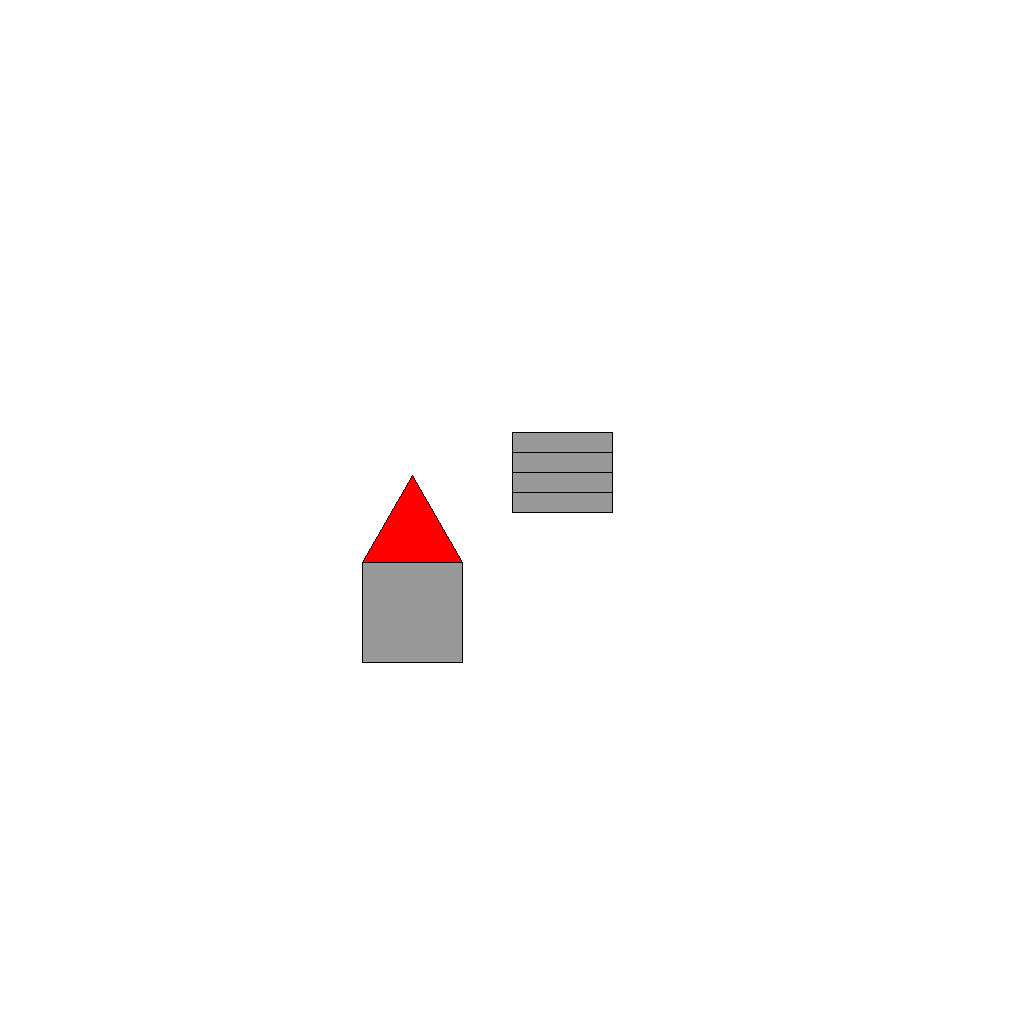

In [37]:
    
# Um das Haus zu zeichnen nutzen wir ein Rechteck und ein Dreieck
def draw_house(x, y, width, height):
    draw_rectangle(x, y, width, height)
    draw_triangle(x, y + height, width)
    return

def draw_skyscraper(x, y, width, height, num_storeys):
    i = 0
    while i < num_storeys:
        draw_rectangle(x, y + i * height, width, height)
        i = i + 1
    
turtle.clear()    
draw_house(-150, -150, 100, 100)
draw_skyscraper(0, 0, 100, 20, 4)
turtle.display()


#### Miniübung 

* Implementieren Sie eine Methoden `draw_house` und `draw_skyscraper`. 

### Kirchen und Flachdächer 

Bisher sind unsere Häuser langweilig. Wir werden uns deshalb die Form der Dächer etwas genauer anschauen. Anstatt nur gleichseitige Dreiecke zuzulassen, erweitern wir unser Programm so, dass wir wir beliebige gleichschenklige Dreiecke zeichnen könenn. Die erlaubt uns auch neue Abstraktionen wie Kirchen, etc. einzuführen. Gleichzeitig können wir damit zeigen, dass nicht nur Prozeduren, sondern auch Funktionen einen wichtigen Platz in der Programmierung einnehmen. 

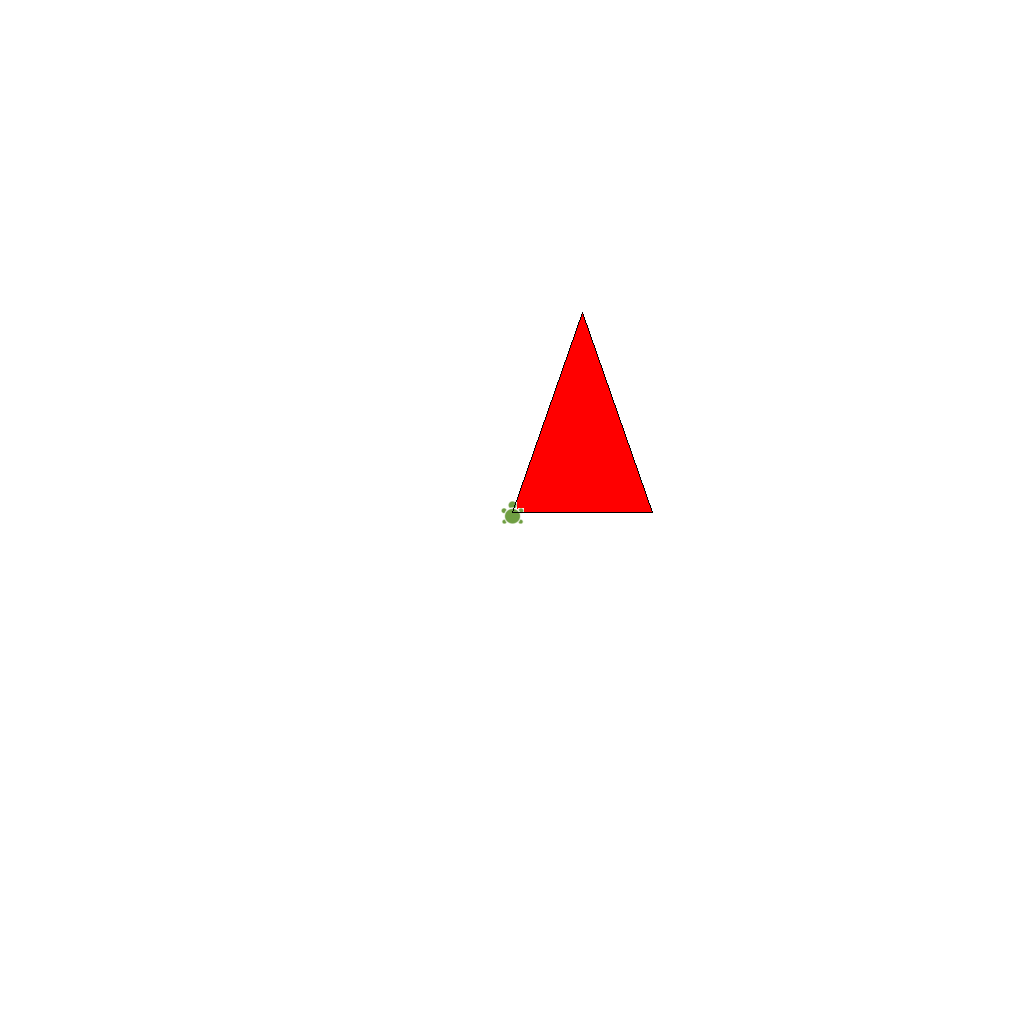

In [38]:
import math 

def draw_isosceles_triangle(x, y, length_base, height):
        turtle.home()
        turtle.reset()
        
        # Move to right place
        turtle.penUp()
        turtle.turnRight(90)
        turtle.forward(x)
        turtle.turnLeft(90)        
        turtle.forward(y)        
        turtle.penDown()
        
        # compute leg and base angle
        length_leg = math.sqrt(length_base / 2 * length_base / 2 + height * height)                
        base_angle = compute_base_angle(length_base, length_leg)        
        vertex_angle = 180 - 2 * base_angle
        
        # Draw triangle
        turtle.penDown()
        turtle.turnRight(90)
        turtle.forward(length_base)
        turtle.turnLeft(180 - base_angle)
        turtle.forward(length_leg)
        turtle.turnLeft(180 - vertex_angle)
        turtle.forward(length_leg)    
    
        # fill
        turtle.penUp();
        turtle.turnLeft(180 - base_angle + base_angle / 2)
        turtle.forward(length_base / 2)
        turtle.penColor('RED');
        turtle.fill();    
    
def compute_base_angle(length_base, length_leg):
    return rad_to_degree(math.acos((length_base / 2) / length_leg))
    
def rad_to_degree(rad):
    return rad / (2 * math.pi) * 360    

turtle.home()
turtle.clear()
turtle.reset()
turtle.penDown()
turtle.drawTurtle()
draw_isosceles_triangle(-0, 0, 140, 200)
turtle.display()
    


#### Miniübung

* Implementieren Sie nun eine Prozedur, um eine Kirche zu zeichnen

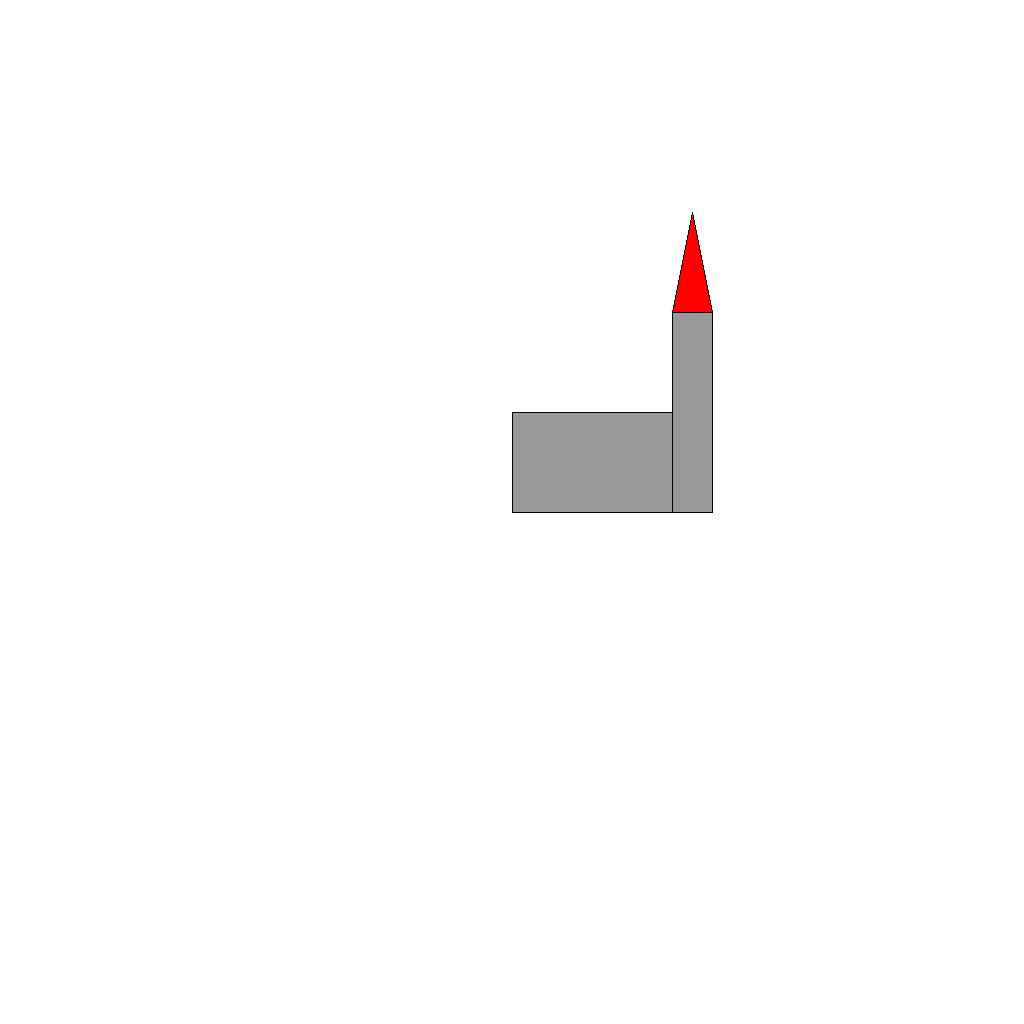

In [39]:
def draw_church(x, y, width, height):
    width_ship = width * 4 / 5
    width_tower = width / 5
    height_tower = height * 2
    height_roof = height
    draw_rectangle(x, y, width_ship, height)
    draw_rectangle(x + width_ship, y, width_tower, height_tower)
    draw_isosceles_triangle(x + width_ship, y + height_tower, width_tower, height_roof)

turtle.clear()
draw_church(0, 0, 200, 100)

turtle.display()

### Endlösung

Mit diesen Methoden können wir nun beliebig komplexe Städte zeichnen. Eine mögliche Lösung ist nachfolgend gezeigt. 

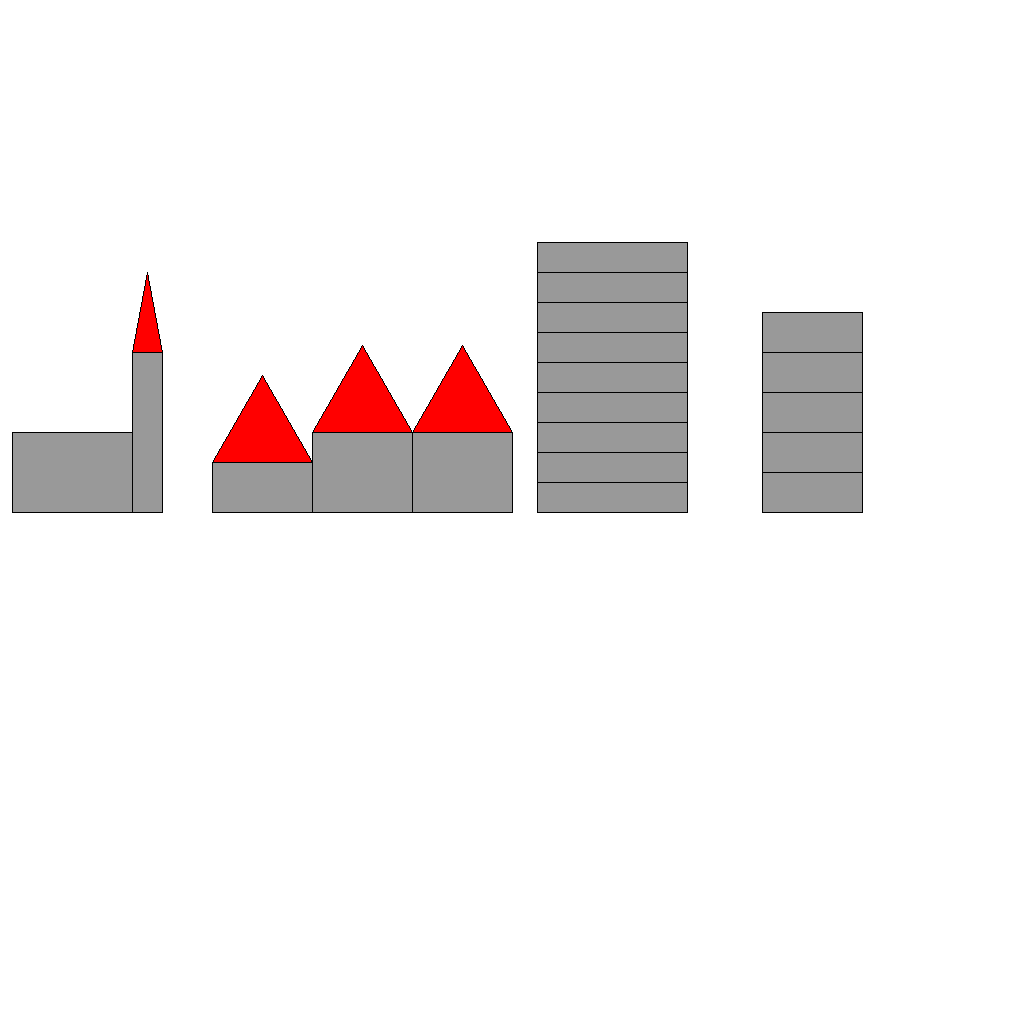

In [40]:
turtle.clear();
draw_church(-500, 0, 150, 80);
draw_house(-300, 0, 100, 50);
draw_house(-200, 0, 100, 80);
draw_house(-100, 0, 100, 80);
draw_skyscraper(250, 0, 100, 40, 5);
draw_skyscraper(25, 0, 150, 30, 9);
turtle.display();          
